In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as  plt
import librosa
import librosa.display
import numpy as np
from IPython.display import Audio
from IPython.core.display import display
from IPython.display import clear_output

C:\Users\Simon\AppData\Local\Temp\ipykernel_17944\948553834.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [2]:
f_names = glob("denoised-segmented\*.wav")

In [3]:
metadata = pd.DataFrame({'file_names':f_names})

In [4]:
metadata.rename(columns = {'test':'TEST'}, inplace = True)

In [5]:
metadata["Class"] = ""

In [6]:
metadata["file_names"] = metadata["file_names"].apply(lambda x: x[19:])

In [7]:
output_dir = "metadata"

In [8]:
# metadata["ClassId"][0]
metadata["Class"].iloc[0] = "hi"

In [9]:
metadata

,file_names,Class
0,"1407,3005_HawkinsT-1978_Gadus-morhua_Grunt_Aqu...",hi
1,"1407,3005_HawkinsT-1978_Gadus-morhua_Grunt_Aqu...",
2,"1407,3005_HawkinsT-1978_Gadus-morhua_Grunt_Aqu...",
3,"1407,3005_HawkinsT-1978_Gadus-morhua_Grunt_Sea...",
4,"1407,3005_HawkinsT-1978_Pollachius-pollachius_...",
...,...,...
389,"817,883,etc_HawkinsT-2002_Melanogrammus-aeglef...",
390,884_AmorimC-2000_Trigloporus-lastoviza_Growl_e...,
391,884_AmorimC-2000_Trigloporus-lastoviza_Growl_e...,
392,884_AmorimC-2000_Trigloporus-lastoviza_Growl_e...,


C:\Users\Simon\AppData\Local\Temp\ipykernel_17944\1948332313.py:10: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  waveform_img = librosa.display.waveshow(signal, x_axis='time', sr=rate, ax=ax[0])


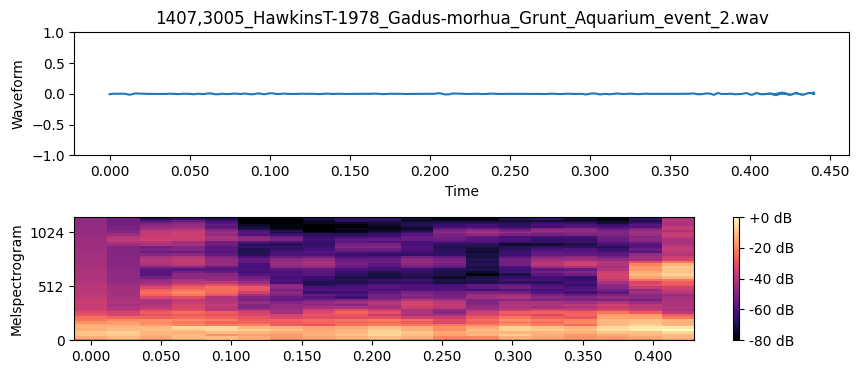

Current File : 1407,3005_HawkinsT-1978_Gadus-morhua_Grunt_Aquarium_event_2.wav
Current Class : 
Current Index : 2


 <


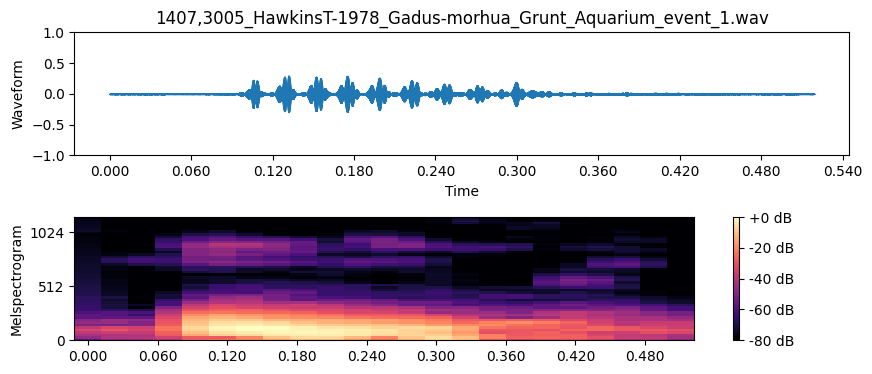

Current File : 1407,3005_HawkinsT-1978_Gadus-morhua_Grunt_Aquarium_event_1.wav
Current Class : update class
Current Index : 1


In [ ]:
index = 0
while (1):
    f_name = metadata["file_names"].iloc[index]
    signal, rate = librosa.load("denoised-segmented/"+f_name)    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,4))
    plt.subplots_adjust(hspace=0.5)

    # Wave form
    ax[0].set(title=f_name)
    waveform_img = librosa.display.waveshow(signal, x_axis='time', sr=rate, ax=ax[0])
    # fig.colorbar(waveform_img, ax=ax[0])
    ax[0].set_ylabel("Waveform")
    ax[0].set_ylim(-1,1)
    ax[1].set_xlabel(None)

    # Melspectrogram
    S = librosa.feature.melspectrogram(y=signal, sr=rate, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    melspec_img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=rate,
                         fmax=8000, ax=ax[1])
    fig.colorbar(melspec_img, ax=ax[1], format='%+2.0f dB')
    ax[1].set_ylabel("Melspectrogram")
    ax[1].set_ylim(0,1250)
    ax[1].set_xlabel(None)
    plt.show()

    display(Audio(filename = f"denoised-segmented/{f_name}", rate=rate))
    print("Current File : "+f_name)
    print("Current Class : "+metadata["Class"].iloc[index])
    print("Current Index : "+str(index))
    class_name = input()
    if (class_name == "save"):
        metadata.to_csv("metadata/metadata.csv", sep=",",index=False)
        continue
    elif (class_name == "stop"):
        metadata.to_csv("metadata/metadata.csv", sep=",",index=False)
        break
    elif (class_name == ">"):
        index += 1
        continue
    elif (class_name == "<"):
        index += -1
        continue
    else:
        metadata["Class"].iloc[index] = class_name
        index += 1
    clear_output(wait=True)

In [20]:
metadata.to_csv("metadata/metadata.csv", sep=",",index=False)

In [24]:
import os
# importing shutil module
import shutil

In [46]:
directory = "C:/Users/Simon/fishsounds/Audio"

for index, f_name in enumerate(metadata["file_names"]):
    class_name = metadata["Class"].iloc[index].strip()
    path = os.path.join(directory, class_name) 
    #make dir
    try:
        os.mkdir(path)
    except:
        pass
    # Python program to explain shutil.copy() method


    # Source path
    source = os.path.join("denoised-segmented", f_name)
    
    # Destination path
    destination = os.path.join(path, f_name)
    
    # Copy the content of
    # source to destination
    
    try:
    	shutil.copy(source, destination)
    	print("File copied successfully.")
    
    # If source and destination are same
    except shutil.SameFileError:
    	print("Source and destination represents the same file.")
    
    # If there is any permission issue
    except PermissionError:
    	print("Permission denied.")
    
    # For other errors
    except:
    	print("Error occurred while copying file.")


File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied successfully.
File copied 

In [37]:
os.mkdir("C:/Users/Simon/fishsounds/Audio")